<a href="https://colab.research.google.com/github/lolek27/ML-entity_matching/blob/main/abt_buy_entity_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Read the data for Abt and Buy

In [1]:
import pandas as pd
import numpy as np

abt_buy_train_df = pd.read_csv("/content/drive/MyDrive/ML/data/abt_buy/gs_train.csv")
abt_buy_train_recs = abt_buy_train_df.to_dict('records')

abt_buy_val_df = pd.read_csv("/content/drive/MyDrive/ML/data/abt_buy/gs_val.csv")
abt_buy_val_recs = abt_buy_val_df.to_dict('records')

abt_buy_test_df = pd.read_csv("/content/drive/MyDrive/ML/data/abt_buy/gs_test.csv")
abt_buy_test_recs = abt_buy_test_df.to_dict('records')

abt_df = pd.read_csv("/content/drive/MyDrive/ML/data/abt_buy/1_abt.csv",  encoding = "ISO-8859-1")
abt_recs = abt_df.to_dict('records')

buy_df = pd.read_csv("/content/drive/MyDrive/ML/data/abt_buy/2_buy.csv",  encoding = "ISO-8859-1")
buy_recs = buy_df.to_dict('records')

abt_id_to_rec_map = {a['subject_id']: a for a in abt_recs}
buy_id_to_rec_map = {b['subject_id']: b for b in buy_recs}

len(abt_buy_train_recs), len(abt_buy_val_recs), len(abt_buy_test_recs), len(abt_recs), len(buy_recs)

(5010, 1439, 710, 1081, 1092)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
abt_buy_train_df.head()

,source_id,target_id,matching
0,33161,207390654,False
1,36258,208085180,False
2,17417,90125786,False
3,34309,208504304,False
4,8060,90138537,False


In [7]:
abt_df.head()

,subject_id,name,description,price
0,552,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,NaN
1,580,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399.0
2,4696,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,49.0
3,5644,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,NaN
4,6284,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,158.0


In [ ]:
buy_df.head()

,subject_id,name,description,manufacturer,price
0,10011646,Linksys EtherFast EZXS88W Ethernet Switch - EZ...,Linksys EtherFast 8-Port 10/100 Switch (New/Wo...,LINKSYS,NaN
1,10140760,Linksys EtherFast EZXS55W Ethernet Switch,5 x 10/100Base-TX LAN,LINKSYS,NaN
2,10221960,Netgear ProSafe FS105 Ethernet Switch - FS105NA,NETGEAR FS105 Prosafe 5 Port 10/100 Desktop Sw...,Netgear,NaN
3,10246269,Belkin Pro Series High Integrity VGA/SVGA Moni...,1 x HD-15 - 1 x HD-15 - 10ft - Beige,Belkin,NaN
4,10315184,Netgear ProSafe JFS516 Ethernet Switch,Netgear ProSafe 16 Port 10/100 Rackmount Switc...,Netgear,NaN


##1.1 Data exploration

Positive to all-samples ratio for train, val and test:

In [ ]:
train_pos = len([a for a in abt_buy_train_recs if a['matching']])
val_pos = len([a for a in abt_buy_val_recs if a['matching']])
test_pos = len([a for a in abt_buy_test_recs if a['matching']])
train_pos, train_pos/len(abt_buy_train_recs), val_pos, val_pos/len(abt_buy_val_recs), test_pos, test_pos/len(abt_buy_test_recs)

(764, 0.15249500998003993, 220, 0.15288394718554552, 109, 0.15352112676056337)

 - Positive matches constitute about 15% of all data points

In [11]:
len(abt_df[abt_df['name'].isnull()]) / len(abt_df), len(buy_df[buy_df['name'].isnull()]) / len(buy_df)

(0.0, 0.0)

- All records for both Abt and Buy have names set.

In [10]:
len(abt_df[abt_df['price'].isnull()]) / len(abt_df), len(buy_df[buy_df['price'].isnull()]) / len(buy_df)

(0.6133209990749307, 0.4597069597069597)

- 61% Abt records and 45% Buy recs lack price info

In [8]:
len(abt_df[abt_df['description'].isnull()]) / len(abt_df), len(buy_df[buy_df['description'].isnull()]) / len(buy_df)

(0.0, 0.40384615384615385)

- No Abt records and 40% Buy recs lack description

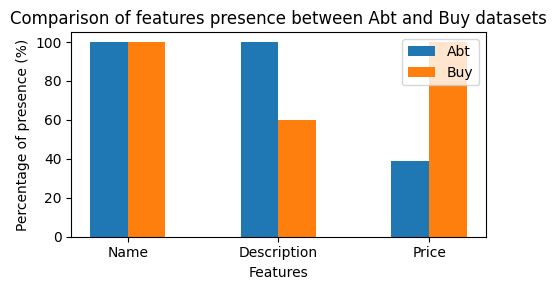

In [15]:
import matplotlib.pyplot as plt

# Data
datasets = ['Abt', 'Buy']
features = ['Name', 'Description', 'Price']
abt_values = [100, 100, 38.7]
buy_values = [100, 60, 100]

# Bar width
bar_width = 0.25

# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 3))

# Plotting the data
abt_bars = ax.bar(
    [i - bar_width/2 for i in range(len(features))],
    abt_values,
    bar_width,
    label='Abt'
)
buy_bars = ax.bar(
    [i + bar_width/2 for i in range(len(features))],
    buy_values,
    bar_width,
    label='Buy'
)

# Adding labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Percentage of presence (%)')
ax.set_title('Comparison of features presence between Abt and Buy datasets')
ax.set_xticks([i for i in range(len(features))])
ax.set_xticklabels(features)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

#2. Apply Sentence-Transformers embeddings + ScaNN Search

Create descriptions of record:

In [2]:
def get_description(rec):
    price = 'unknown' if np.isnan(rec['price']) else rec['price']
    return f"The name of the product is {rec['name']}. Description: {rec['description']}. The price is {price}."

In [ ]:
!pip install transformers sentence_transformers scann

In [3]:
from search import Searcher

config = {
    'model_name': 'sentence-transformers/all-mpnet-base-v2',
    'mappings': abt_buy_test_recs,
    'db_recs': abt_recs,
    'search': {
        'candidates_len': 10,
    },
    'description_fn': get_description
}
searcher = Searcher(config)

Loading sentence-transformers/all-mpnet-base-v2...


In [4]:
query_test_recs = [ buy_id_to_rec_map[a['target_id']] for a in abt_buy_test_recs]
searcher.embed_and_search(query_test_recs)
len(searcher.db_embeddings), len(searcher.query_embeddings)

Generate descriptions for all 1081 products
Generating embeddings for 1024 descriptions
Generate descriptions for all queries
Init search engine...
10 200 50
Searching to 10 candidates for test queries...
Neighbors len: 710


(1081, 710)

For pre-trained embeddings recall@1 is less than 68% and F1 score for positive class is about 72.9%

In [ ]:
predictions = searcher.get_predictions_for_top_ks()
metrics_base = searcher.get_metrics(predictions)
metrics_base

[{'False': {'precision': 0.9431818181818182,
   'recall': 0.9667221297836939,
   'f1-score': 0.9548069022185702,
   'support': 601},
  'True': {'precision': 0.7872340425531915,
   'recall': 0.6788990825688074,
   'f1-score': 0.729064039408867,
   'support': 109},
  'accuracy': 0.9225352112676056,
  'macro avg': {'precision': 0.8652079303675049,
   'recall': 0.8228106061762506,
   'f1-score': 0.8419354708137186,
   'support': 710},
  'weighted avg': {'precision': 0.9192405399515079,
   'recall': 0.9225352112676056,
   'f1-score': 0.9201506035618693,
   'support': 710}},
 {'False': {'precision': 0.9644760213143873,
   'recall': 0.9034941763727121,
   'f1-score': 0.9329896907216495,
   'support': 601},
  'True': {'precision': 0.6054421768707483,
   'recall': 0.8165137614678899,
   'f1-score': 0.6953125,
   'support': 109},
  'accuracy': 0.8901408450704226,
  'macro avg': {'precision': 0.7849590990925678,
   'recall': 0.860003968920301,
   'f1-score': 0.8141510953608248,
   'support': 710}

In [7]:
len(searcher.neighbors), len(searcher.distances)

(710, 710)

### Error analysis

The pretrained embeddings are not sensitive enough to subtle differences in model names, e.g. LCSX20 and LCSMX100

In [ ]:
buy_test_recs = [ buy_id_to_rec_map[a['target_id']] for a in abt_buy_test_recs]
k = 1
wrongs_true1 = []
for i, p in enumerate(predictions):
  if abt_buy_test_recs[i]['matching'] and not p[str(k)]:
    wrongs_true1.append((i, buy_test_recs[i], abt_id_to_rec_map[abt_buy_test_recs[i]['source_id']], abt_recs[searcher.neighbors[i][0]])) #take first prediction
len(wrongs_true1), wrongs_true1[:3]

(35,
 [(2,
   {'subject_id': 207390682,
    'name': 'Sony LCS-X20 Camcorder Case - LCSX20',
    'description': 'Nylon, Polyamide - Black',
    'manufacturer': 'Sony',
    'price': nan},
   {'subject_id': 34036,
    'name': 'Sony Black Handycam Camcorder Soft Carrying Case - LCSX20',
    'description': 'Sony Black Handycam Camcorder Soft Carrying Case - LCSX20/ Compatible To Hard Drive And DVD Camcorders/ Stain Resistant Nylon/ Organizer For Accessories/ Shoulder Held Case',
    'price': nan},
   {'subject_id': 34150,
    'name': 'Sony Soft Camera Carrying Case - LCSMX100',
    'description': 'Sony Soft Camera Carrying Case - LCSMX100/ Stain Resistant Nylon/ Colored Interior/ Movable Partition/ Build-In Modular Interface/ Black Finish',
    'price': nan}),
  (12,
   {'subject_id': 90138537,
    'name': 'Panasonic KX-TSC14B Corded Telephone',
    'description': '2 x Phone Line(s) - Headset - Black',
    'manufacturer': 'Panasonic',
    'price': nan},
   {'subject_id': 30590,
    'name': 

#3. Fine-tune Sentence transformers on train + val pairs

### Multiple Negative Ranking Loss

In [3]:
pairs_pos_train = [(abt_id_to_rec_map[ab["source_id"]], buy_id_to_rec_map[ab["target_id"]]) for ab in abt_buy_train_recs + abt_buy_val_recs if ab['matching']]
pairs_neg_train = [(abt_id_to_rec_map[ab["source_id"]], buy_id_to_rec_map[ab["target_id"]]) for ab in abt_buy_train_recs + abt_buy_val_recs if not ab['matching']]

description_pos = [(get_description(a), get_description(b)) for a, b in pairs_pos_train]
description_neg = [(get_description(a), get_description(b)) for a, b in pairs_neg_train]

In [12]:
description_pos[0]

('The name of the product is Samsung S2 White 1GB Flash MP3 Player - YPS2ZW. Description: Samsung S2 White 1GB Flash MP3 Player - YPS2ZW/ Super Compact Pebble Shape Design/ Supports MP3, WMA And Ogg/ 1 GB Internal Flash Memory/ Multi-Color LED Light Effects/ Embedded Easy-To-Use Playback Controls/ DNSe 2.0 Enabled/ USB Connection/ Up To 13 Hours Of Playback/ White Finish. The price is unknown.',
 'The name of the product is Samsung YP-S2ZW 1GB Flash MP3 Player - YP-S2ZW/XAA. Description: 1GB Flash Memory - White. The price is 29.67.')

In [18]:
from search import Searcher
from sentence_transformers import losses

config = {
    'model_name': 'sentence-transformers/all-mpnet-base-v2',
    'mappings': abt_buy_test_recs,
    'db_recs': abt_recs,
    'search': {
        'candidates_len': 10,
     },
    'description_fn': get_description,
    'train': {
        'epochs': 40,
        'batch_size': 32,
        'loss': losses.MultipleNegativesRankingLoss
    }

}
searcher = Searcher(config)

Loading sentence-transformers/all-mpnet-base-v2...


In [5]:
searcher.fine_tune_embeddings(description_pos)
query_test_recs = [ buy_id_to_rec_map[a['target_id']] for a in abt_buy_test_recs]
searcher.embed_and_search(query_test_recs)

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

Generate descriptions for all 1081 products
Generating embeddings for 1024 descriptions
Generate descriptions for all queries
Init search engine...
10 200 50
Searching to 10 candidates for test queries...
Neighbors len: 710


Fine-tunning embeddings improved the recall@1 by **~23% ** and positive class F1 score by almost **22%**!

In [ ]:
predictions = searcher.get_predictions_for_top_ks()
metrics_mnrl = searcher.get_metrics(predictions)

In [ ]:
metrics_mnrl

[{'False': {'precision': 0.9851973684210527,
   'recall': 0.9966722129783694,
   'f1-score': 0.9909015715467329,
   'support': 601},
  'True': {'precision': 0.9803921568627451,
   'recall': 0.9174311926605505,
   'f1-score': 0.9478672985781992,
   'support': 109},
  'accuracy': 0.9845070422535211,
  'macro avg': {'precision': 0.9827947626418989,
   'recall': 0.95705170281946,
   'f1-score': 0.9693844350624661,
   'support': 710},
  'weighted avg': {'precision': 0.9844596669282983,
   'recall': 0.9845070422535211,
   'f1-score': 0.9842949014712818,
   'support': 710}},
 {'False': {'precision': 0.9861830742659758,
   'recall': 0.9500831946755408,
   'f1-score': 0.9677966101694916,
   'support': 601},
  'True': {'precision': 0.7709923664122137,
   'recall': 0.926605504587156,
   'f1-score': 0.8416666666666667,
   'support': 109},
  'accuracy': 0.9464788732394366,
  'macro avg': {'precision': 0.8785877203390948,
   'recall': 0.9383443496313484,
   'f1-score': 0.9047316384180791,
   'suppor

#4. Fine-tune Sentence transformers on *augmented* train + val pairs

## 4.1. Data Augmentation

In [ ]:
!pip install nlpaug

In [9]:
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import random

def define_augmenter():
    np.random.seed(42)

    stopwords = ['name', 'product', 'description', 'price']
    aug_arr = []
    aug_arr.append(naw.ContextualWordEmbsAug(aug_p = 0.1, action='substitute', top_k = 5, aug_min=0, aug_max = 3, stopwords=stopwords))
    aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='crop', aug_min=1, aug_max = 3))
    aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='swap', aug_min=1, aug_max = 5, stopwords=stopwords))
    aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='delete', aug_min=1, aug_max = 4,  stopwords=stopwords))
    aug_arr.append( nac.RandomCharAug(aug_char_p=0.1, action='swap', aug_char_min =1, aug_char_max=5, include_numeric=False, stopwords=stopwords))
    aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='delete', aug_char_min =1, aug_char_max=4, stopwords=stopwords))
    aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='insert', aug_char_min =1, aug_char_max=4, include_numeric=False, stopwords=stopwords))
    aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='substitute', aug_char_min =1, aug_char_max=4, include_numeric=False, stopwords=stopwords))

    return aug_arr

aug_arr = define_augmenter()

In [13]:
sent = 'War is old men talking and young men dying'
aug_arr[0].augment(sent)[0], aug_arr[2].augment(sent)[0]

('war is about men talking and young men dying',
 'War is old men and talking young men dying')

In [14]:
pairs_pos_train = [(get_description(abt_id_to_rec_map[ab["source_id"]]), get_description(buy_id_to_rec_map[ab["target_id"]])) for ab in abt_buy_train_recs + abt_buy_val_recs if ab['matching']]
pairs_neg_train = [(get_description(abt_id_to_rec_map[ab["source_id"]]), get_description(buy_id_to_rec_map[ab["target_id"]])) for ab in abt_buy_train_recs + abt_buy_val_recs if not ab['matching']]


len(pairs_pos_train), len(pairs_neg_train)

(984, 5465)

In [15]:
def augment(datapoint, aug_arr):
    # choose if this sample is going to be augmented - let's augment with prob 50%
    if np.random.rand() >= 0.5:
        # select augmenter index from arr of augmenters
        ind = int(np.round(np.random.rand() * (len(aug_arr) - 1)))
        aug_sample = aug_arr[ind].augment(datapoint)[0]
        return aug_sample
    return False

def augment_dataset(data):
  aug_arr = define_augmenter()
  augmented_data = []

  for d in data:
    augmented_data.append(d)

    d0 = augment(d[0], aug_arr)
    d1 = augment(d[1], aug_arr)
    if not d0 and not d1:
      continue

    augmented_data.append((d0 if d0 else d[0], d1 if d1 else d[1]))

  return augmented_data

data_pos_aug = augment_dataset(pairs_pos_train)
data_neg_aug = augment_dataset(pairs_neg_train)

len(pairs_pos_train), len(data_pos_aug), len(pairs_neg_train), len(data_neg_aug)

(984, 1724, 5465, 9556)

- After augmenting we have about 50% more datapoints for training.

In [ ]:
data_pos_aug[:6]

[('The name of the product is Samsung S2 White 1GB Flash MP3 Player - YPS2ZW. Description: Samsung S2 White 1GB Flash MP3 Player - YPS2ZW/ Super Compact Pebble Shape Design/ Supports MP3, WMA And Ogg/ 1 GB Internal Flash Memory/ Multi-Color LED Light Effects/ Embedded Easy-To-Use Playback Controls/ DNSe 2.0 Enabled/ USB Connection/ Up To 13 Hours Of Playback/ White Finish. The price is unknown.',
  'The name of the product is Samsung YP-S2ZW 1GB Flash MP3 Player - YP-S2ZW/XAA. Description: 1GB Flash Memory - White. The price is 29.67.'),
 ('The name of the product is Samsung S2 White 1GB Flash MP3 Player - YPS2ZW. Description: Samsung S2 WhTte 1GB Flash MP3 Player - YPSjZW / Tuper Compac+ Pebble Shape Design / SuppoJts MP3, WMA And Ogg / 1 GB Internal Flash MeTory / Milti - Color LED Light EffActs / Embedded Easy - To - Use Playback Controls / DNSe 2. 0 Enabled / USB Connectio& / Up To 13 Hours Of Playback / White Finish. The price is unknown.',
  'The name of the product is Samsnug YP

In [ ]:
# assing augmented data to positive & negative pairs before fine tuning
description_pos = data_pos_aug
description_neg = data_neg_aug

##4.2. Train ST and search (ScaNN)

In [24]:
from search import Searcher
from sentence_transformers import losses

config = {
    'model_name': 'sentence-transformers/all-mpnet-base-v2',
    'mappings': abt_buy_test_recs,
    'db_recs': abt_recs,
    'search': {
        'candidates_len': 10,
     },
    'description_fn': get_description,
    'train': {
        'epochs': 40,
        'batch_size': 32,
        'loss': losses.MultipleNegativesRankingLoss
    }

}
searcher = Searcher(config)


Loading sentence-transformers/all-mpnet-base-v2...


In [22]:
len(description_pos)

1724

In [25]:
searcher.fine_tune_embeddings(description_pos)
query_test_recs = [ buy_id_to_rec_map[a['target_id']] for a in abt_buy_test_recs]
searcher.embed_and_search(query_test_recs)

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Iteration:   0%|          | 0/54 [00:00<?, ?it/s]

Iteration:   0%|          | 0/54 [00:00<?, ?it/s]

Iteration:   0%|          | 0/54 [00:00<?, ?it/s]

Iteration:   0%|          | 0/54 [00:00<?, ?it/s]

Generate descriptions for all 1081 products
Generating embeddings for 1024 descriptions
Generate descriptions for all queries
Init search engine...
10 200 50
Searching to 10 candidates for test queries...
Neighbors len: 710


Fine-tunning embeddings on augmented dataset improved the recall@1 by additional **~1% ** and positive class F1 score by almost **2%**!

In [ ]:
predictions = searcher.get_predictions_for_top_ks()
metrics_mnrl_aug = searcher.get_metrics(predictions)
metrics_mnrl_aug

[{'False': {'precision': 0.9884868421052632,
   'recall': 1.0,
   'f1-score': 0.9942100909842845,
   'support': 601},
  'True': {'precision': 1.0,
   'recall': 0.9357798165137615,
   'f1-score': 0.966824644549763,
   'support': 109},
  'accuracy': 0.9901408450704225,
  'macro avg': {'precision': 0.9942434210526316,
   'recall': 0.9678899082568808,
   'f1-score': 0.9805173677670238,
   'support': 710},
  'weighted avg': {'precision': 0.9902543550778354,
   'recall': 0.9901408450704225,
   'f1-score': 0.9900058463908157,
   'support': 710}},
 {'False': {'precision': 0.9929824561403509,
   'recall': 0.9417637271214643,
   'f1-score': 0.9666951323654995,
   'support': 601},
  'True': {'precision': 0.75,
   'recall': 0.963302752293578,
   'f1-score': 0.8433734939759036,
   'support': 109},
  'accuracy': 0.9450704225352112,
  'macro avg': {'precision': 0.8714912280701754,
   'recall': 0.9525332397075211,
   'f1-score': 0.9050343131707015,
   'support': 710},
  'weighted avg': {'precision': 0

## Plot models

In [ ]:
metrics_tuned = [{'False': {'precision': 0.9851485148514851,
   'recall': 0.9933444259567388,
   'f1-score': 0.9892294946147473,
   'support': 601},
  'True': {'precision': 0.9615384615384616,
   'recall': 0.9174311926605505,
   'f1-score': 0.9389671361502349,
   'support': 109},
  'accuracy': 0.9816901408450704,
  'macro avg': {'precision': 0.9733434881949734,
   'recall': 0.9553878093086446,
   'f1-score': 0.9640983153824911,
   'support': 710},
  'weighted avg': {'precision': 0.9815238728639927,
   'recall': 0.9816901408450704,
   'f1-score': 0.9815131607096319,
   'support': 710}},
 {'False': {'precision': 0.986013986013986,
   'recall': 0.9384359400998337,
   'f1-score': 0.9616368286445013,
   'support': 601},
  'True': {'precision': 0.7318840579710145,
   'recall': 0.926605504587156,
   'f1-score': 0.8178137651821862,
   'support': 109},
  'accuracy': 0.9366197183098591,
  'macro avg': {'precision': 0.8589490219925002,
   'recall': 0.9325207223434948,
   'f1-score': 0.8897252969133438,
   'support': 710},
  'weighted avg': {'precision': 0.9469996731172483,
   'recall': 0.9366197183098591,
   'f1-score': 0.9395569498876106,
   'support': 710}},
 {'False': {'precision': 0.9906716417910447,
   'recall': 0.8835274542429284,
   'f1-score': 0.9340369393139841,
   'support': 601},
  'True': {'precision': 0.5977011494252874,
   'recall': 0.9541284403669725,
   'f1-score': 0.734982332155477,
   'support': 109},
  'accuracy': 0.8943661971830986,
  'macro avg': {'precision': 0.7941863956081661,
   'recall': 0.9188279473049505,
   'f1-score': 0.8345096357347306,
   'support': 710},
  'weighted avg': {'precision': 0.9303423690194003,
   'recall': 0.8943661971830986,
   'f1-score': 0.9034778517361288,
   'support': 710}},
 {'False': {'precision': 0.9903846153846154,
   'recall': 0.8569051580698835,
   'f1-score': 0.9188224799286352,
   'support': 601},
  'True': {'precision': 0.5473684210526316,
   'recall': 0.9541284403669725,
   'f1-score': 0.6956521739130436,
   'support': 109},
  'accuracy': 0.8718309859154929,
  'macro avg': {'precision': 0.7688765182186235,
   'recall': 0.9055167992184281,
   'f1-score': 0.8072373269208394,
   'support': 710},
  'weighted avg': {'precision': 0.9223722700575925,
   'recall': 0.8718309859154929,
   'f1-score': 0.8845611230896219,
   'support': 710}},
 {'False': {'precision': 0.9919678714859438,
   'recall': 0.8219633943427621,
   'f1-score': 0.8989990900818927,
   'support': 601},
  'True': {'precision': 0.49528301886792453,
   'recall': 0.963302752293578,
   'f1-score': 0.6542056074766356,
   'support': 109},
  'accuracy': 0.8436619718309859,
  'macro avg': {'precision': 0.7436254451769342,
   'recall': 0.89263307331817,
   'f1-score': 0.7766023487792642,
   'support': 710},
  'weighted avg': {'precision': 0.9157162532671211,
   'recall': 0.8436619718309859,
   'f1-score': 0.8614181188086912,
   'support': 710}},
 {'False': {'precision': 0.9915254237288136,
   'recall': 0.778702163061564,
   'f1-score': 0.8723205964585274,
   'support': 601},
  'True': {'precision': 0.4411764705882353,
   'recall': 0.963302752293578,
   'f1-score': 0.6051873198847262,
   'support': 109},
  'accuracy': 0.8070422535211268,
  'macro avg': {'precision': 0.7163509471585244,
   'recall': 0.871002457677571,
   'f1-score': 0.7387539581716268,
   'support': 710},
  'weighted avg': {'precision': 0.9070352323311754,
   'recall': 0.8070422535211268,
   'f1-score': 0.8313099948436762,
   'support': 710}},
 {'False': {'precision': 0.9935064935064936,
   'recall': 0.7637271214642263,
   'f1-score': 0.863593603010348,
   'support': 601},
  'True': {'precision': 0.4274193548387097,
   'recall': 0.9724770642201835,
   'f1-score': 0.5938375350140056,
   'support': 109},
  'accuracy': 0.795774647887324,
  'macro avg': {'precision': 0.7104629241726016,
   'recall': 0.868102092842205,
   'f1-score': 0.7287155690121768,
   'support': 710},
  'weighted avg': {'precision': 0.9066001581335521,
   'recall': 0.795774647887324,
   'f1-score': 0.8221803475010504,
   'support': 710}},
 {'False': {'precision': 0.9955156950672646,
   'recall': 0.7387687188019967,
   'f1-score': 0.8481375358166189,
   'support': 601},
  'True': {'precision': 0.4053030303030303,
   'recall': 0.981651376146789,
   'f1-score': 0.5737265415549597,
   'support': 109},
  'accuracy': 0.776056338028169,
  'macro avg': {'precision': 0.7004093626851474,
   'recall': 0.8602100474743928,
   'f1-score': 0.7109320386857894,
   'support': 710},
  'weighted avg': {'precision': 0.9049055817443045,
   'recall': 0.776056338028169,
   'f1-score': 0.8060096507820824,
   'support': 710}},
 {'False': {'precision': 0.9953271028037384,
   'recall': 0.7088186356073212,
   'f1-score': 0.8279883381924199,
   'support': 601},
  'True': {'precision': 0.37943262411347517,
   'recall': 0.981651376146789,
   'f1-score': 0.5473145780051151,
   'support': 109},
  'accuracy': 0.7507042253521127,
  'macro avg': {'precision': 0.6873798634586068,
   'recall': 0.845235005877055,
   'f1-score': 0.6876514580987675,
   'support': 710},
  'weighted avg': {'precision': 0.9007742884695994,
   'recall': 0.7507042253521127,
   'f1-score': 0.7848989862763407,
   'support': 710}},
 {'False': {'precision': 0.9951923076923077,
   'recall': 0.6888519134775375,
   'f1-score': 0.8141592920353983,
   'support': 601},
  'True': {'precision': 0.36394557823129253,
   'recall': 0.981651376146789,
   'f1-score': 0.5310173697270472,
   'support': 109},
  'accuracy': 0.7338028169014085,
  'macro avg': {'precision': 0.6795689429618001,
   'recall': 0.8352516448121632,
   'f1-score': 0.6725883308812227,
   'support': 710},
  'weighted avg': {'precision': 0.898282598521532,
   'recall': 0.7338028169014085,
   'f1-score': 0.7706910250894683,
   'support': 710}}]

metrics_tuned_aug = [{'False': {'precision': 0.9884868421052632,
   'recall': 1.0,
   'f1-score': 0.9942100909842845,
   'support': 601},
  'True': {'precision': 1.0,
   'recall': 0.9357798165137615,
   'f1-score': 0.966824644549763,
   'support': 109},
  'accuracy': 0.9901408450704225,
  'macro avg': {'precision': 0.9942434210526316,
   'recall': 0.9678899082568808,
   'f1-score': 0.9805173677670238,
   'support': 710},
  'weighted avg': {'precision': 0.9902543550778354,
   'recall': 0.9901408450704225,
   'f1-score': 0.9900058463908157,
   'support': 710}},
 {'False': {'precision': 0.9929824561403509,
   'recall': 0.9417637271214643,
   'f1-score': 0.9666951323654995,
   'support': 601},
  'True': {'precision': 0.75,
   'recall': 0.963302752293578,
   'f1-score': 0.8433734939759036,
   'support': 109},
  'accuracy': 0.9450704225352112,
  'macro avg': {'precision': 0.8714912280701754,
   'recall': 0.9525332397075211,
   'f1-score': 0.9050343131707015,
   'support': 710},
  'weighted avg': {'precision': 0.955679515690635,
   'recall': 0.9450704225352112,
   'f1-score': 0.9477626554859699,
   'support': 710}},
 {'False': {'precision': 0.994392523364486,
   'recall': 0.8851913477537438,
   'f1-score': 0.9366197183098592,
   'support': 601},
  'True': {'precision': 0.6057142857142858,
   'recall': 0.9724770642201835,
   'f1-score': 0.7464788732394366,
   'support': 109},
  'accuracy': 0.8985915492957747,
  'macro avg': {'precision': 0.8000534045393859,
   'recall': 0.9288342059869636,
   'f1-score': 0.841549295774648,
   'support': 710},
  'weighted avg': {'precision': 0.9347222023731172,
   'recall': 0.8985915492957747,
   'f1-score': 0.9074290815314423,
   'support': 710}},
 {'False': {'precision': 0.9980694980694981,
   'recall': 0.8602329450915142,
   'f1-score': 0.9240393208221627,
   'support': 601},
  'True': {'precision': 0.5625,
   'recall': 0.9908256880733946,
   'f1-score': 0.717607973421927,
   'support': 109},
  'accuracy': 0.8802816901408451,
  'macro avg': {'precision': 0.7802847490347491,
   'recall': 0.9255293165824543,
   'f1-score': 0.8208236471220448,
   'support': 710},
  'weighted avg': {'precision': 0.9312003779433358,
   'recall': 0.8802816901408451,
   'f1-score': 0.892347747770577,
   'support': 710}},
 {'False': {'precision': 1.0,
   'recall': 0.8352745424292846,
   'f1-score': 0.9102447869446962,
   'support': 601},
  'True': {'precision': 0.5240384615384616,
   'recall': 1.0,
   'f1-score': 0.6876971608832807,
   'support': 109},
  'accuracy': 0.8605633802816901,
  'macro avg': {'precision': 0.7620192307692308,
   'recall': 0.9176372712146423,
   'f1-score': 0.7989709739139885,
   'support': 710},
  'weighted avg': {'precision': 0.9269298483206934,
   'recall': 0.8605633802816901,
   'f1-score': 0.8760790246338593,
   'support': 710}},
 {'False': {'precision': 1.0,
   'recall': 0.800332778702163,
   'f1-score': 0.8890942698706099,
   'support': 601},
  'True': {'precision': 0.4759825327510917,
   'recall': 1.0,
   'f1-score': 0.6449704142011834,
   'support': 109},
  'accuracy': 0.8309859154929577,
  'macro avg': {'precision': 0.7379912663755459,
   'recall': 0.9001663893510815,
   'f1-score': 0.7670323420358967,
   'support': 710},
  'weighted avg': {'precision': 0.919552247985731,
   'recall': 0.8309859154929577,
   'f1-score': 0.8516161004791064,
   'support': 710}},
 {'False': {'precision': 1.0,
   'recall': 0.778702163061564,
   'f1-score': 0.8755846585594013,
   'support': 601},
  'True': {'precision': 0.45041322314049587,
   'recall': 1.0,
   'f1-score': 0.6210826210826211,
   'support': 109},
  'accuracy': 0.8126760563380282,
  'macro avg': {'precision': 0.7252066115702479,
   'recall': 0.889351081530782,
   'f1-score': 0.7483336398210112,
   'support': 710},
  'weighted avg': {'precision': 0.9156268187638226,
   'recall': 0.8126760563380282,
   'f1-score': 0.8365132190031068,
   'support': 710}},
 {'False': {'precision': 1.0,
   'recall': 0.7537437603993344,
   'f1-score': 0.8595825426944972,
   'support': 601},
  'True': {'precision': 0.42412451361867703,
   'recall': 1.0,
   'f1-score': 0.5956284153005464,
   'support': 109},
  'accuracy': 0.7915492957746478,
  'macro avg': {'precision': 0.7120622568093385,
   'recall': 0.8768718801996672,
   'f1-score': 0.7276054789975218,
   'support': 710},
  'weighted avg': {'precision': 0.9115909464569518,
   'recall': 0.7915492957746478,
   'f1-score': 0.8190600076438765,
   'support': 710}},
 {'False': {'precision': 1.0,
   'recall': 0.7420965058236273,
   'f1-score': 0.8519579751671442,
   'support': 601},
  'True': {'precision': 0.4128787878787879,
   'recall': 1.0,
   'f1-score': 0.5844504021447722,
   'support': 109},
  'accuracy': 0.7816901408450704,
  'macro avg': {'precision': 0.7064393939393939,
   'recall': 0.8710482529118136,
   'f1-score': 0.7182041886559583,
   'support': 710},
  'weighted avg': {'precision': 0.9098644899701238,
   'recall': 0.7816901408450704,
   'f1-score': 0.8108899111397659,
   'support': 710}},
 {'False': {'precision': 1.0,
   'recall': 0.7321131447587355,
   'f1-score': 0.8453410182516811,
   'support': 601},
  'True': {'precision': 0.40370370370370373,
   'recall': 1.0,
   'f1-score': 0.575197889182058,
   'support': 109},
  'accuracy': 0.7732394366197183,
  'macro avg': {'precision': 0.7018518518518518,
   'recall': 0.8660565723793677,
   'f1-score': 0.7102694537168696,
   'support': 710},
  'weighted avg': {'precision': 0.9084559207094418,
   'recall': 0.7732394366197183,
   'f1-score': 0.8038683406902882,
   'support': 710}}]



metrics_base = [{'False': {'precision': 0.9431818181818182,
   'recall': 0.9667221297836939,
   'f1-score': 0.9548069022185702,
   'support': 601},
  'True': {'precision': 0.7872340425531915,
   'recall': 0.6788990825688074,
   'f1-score': 0.729064039408867,
   'support': 109},
  'accuracy': 0.9225352112676056,
  'macro avg': {'precision': 0.8652079303675049,
   'recall': 0.8228106061762506,
   'f1-score': 0.8419354708137186,
   'support': 710},
  'weighted avg': {'precision': 0.9192405399515079,
   'recall': 0.9225352112676056,
   'f1-score': 0.9201506035618693,
   'support': 710}},
 {'False': {'precision': 0.9644760213143873,
   'recall': 0.9034941763727121,
   'f1-score': 0.9329896907216495,
   'support': 601},
  'True': {'precision': 0.6054421768707483,
   'recall': 0.8165137614678899,
   'f1-score': 0.6953125,
   'support': 109},
  'accuracy': 0.8901408450704226,
  'macro avg': {'precision': 0.7849590990925678,
   'recall': 0.860003968920301,
   'f1-score': 0.8141510953608248,
   'support': 710},
  'weighted avg': {'precision': 0.909356740970223,
   'recall': 0.8901408450704226,
   'f1-score': 0.8965012205967765,
   'support': 710}},
 {'False': {'precision': 0.9679245283018868,
   'recall': 0.8535773710482529,
   'f1-score': 0.907161803713528,
   'support': 601},
  'True': {'precision': 0.5111111111111111,
   'recall': 0.8440366972477065,
   'f1-score': 0.6366782006920415,
   'support': 109},
  'accuracy': 0.852112676056338,
  'macro avg': {'precision': 0.7395178197064989,
   'recall': 0.8488070341479796,
   'f1-score': 0.7719200022027848,
   'support': 710},
  'weighted avg': {'precision': 0.8977940177754156,
   'recall': 0.852112676056338,
   'f1-score': 0.8656368562074124,
   'support': 710}},
 {'False': {'precision': 0.9744094488188977,
   'recall': 0.8236272878535774,
   'f1-score': 0.8926961226330027,
   'support': 601},
  'True': {'precision': 0.4752475247524752,
   'recall': 0.8807339449541285,
   'f1-score': 0.6173633440514469,
   'support': 109},
  'accuracy': 0.8323943661971831,
  'macro avg': {'precision': 0.7248284867856865,
   'recall': 0.852180616403853,
   'f1-score': 0.7550297333422248,
   'support': 710},
  'weighted avg': {'precision': 0.8977775478002498,
   'recall': 0.8323943661971831,
   'f1-score': 0.8504267242310454,
   'support': 710}},
 {'False': {'precision': 0.979253112033195,
   'recall': 0.7853577371048253,
   'f1-score': 0.8716528162511542,
   'support': 601},
  'True': {'precision': 0.4342105263157895,
   'recall': 0.908256880733945,
   'f1-score': 0.5875370919881305,
   'support': 109},
  'accuracy': 0.8042253521126761,
  'macro avg': {'precision': 0.7067318191744922,
   'recall': 0.846807308919385,
   'f1-score': 0.7295949541196424,
   'support': 710},
  'weighted avg': {'precision': 0.8955775601413679,
   'recall': 0.8042253521126761,
   'f1-score': 0.8280350501319012,
   'support': 710}},
 {'False': {'precision': 0.9806034482758621,
   'recall': 0.757071547420965,
   'f1-score': 0.8544600938967136,
   'support': 601},
  'True': {'precision': 0.4065040650406504,
   'recall': 0.9174311926605505,
   'f1-score': 0.5633802816901409,
   'support': 109},
  'accuracy': 0.7816901408450704,
  'macro avg': {'precision': 0.6935537566582562,
   'recall': 0.8372513700407578,
   'f1-score': 0.7089201877934272,
   'support': 710},
  'weighted avg': {'precision': 0.8924670640890479,
   'recall': 0.7816901408450704,
   'f1-score': 0.8097731931495075,
   'support': 710}},
 {'False': {'precision': 0.9865470852017937,
   'recall': 0.7321131447587355,
   'f1-score': 0.8404966571155683,
   'support': 601},
  'True': {'precision': 0.39015151515151514,
   'recall': 0.944954128440367,
   'f1-score': 0.5522788203753352,
   'support': 109},
  'accuracy': 0.7647887323943662,
  'macro avg': {'precision': 0.6883493001766544,
   'recall': 0.8385336365995513,
   'f1-score': 0.6963877387454518,
   'support': 710},
  'weighted avg': {'precision': 0.8949877652926663,
   'recall': 0.7647887323943662,
   'f1-score': 0.7962491300667155,
   'support': 710}},
 {'False': {'precision': 0.990521327014218,
   'recall': 0.6955074875207987,
   'f1-score': 0.8172043010752689,
   'support': 601},
  'True': {'precision': 0.3645833333333333,
   'recall': 0.963302752293578,
   'f1-score': 0.5289672544080605,
   'support': 109},
  'accuracy': 0.7366197183098592,
  'macro avg': {'precision': 0.6775523301737757,
   'recall': 0.8294051199071883,
   'f1-score': 0.6730857777416647,
   'support': 710},
  'weighted avg': {'precision': 0.8944266209420823,
   'recall': 0.7366197183098592,
   'f1-score': 0.7729538248967819,
   'support': 710}},
 {'False': {'precision': 0.9924050632911392,
   'recall': 0.6522462562396006,
   'f1-score': 0.7871485943775101,
   'support': 601},
  'True': {'precision': 0.33650793650793653,
   'recall': 0.9724770642201835,
   'f1-score': 0.5,
   'support': 109},
  'accuracy': 0.7014084507042253,
  'macro avg': {'precision': 0.6644564998995379,
   'recall': 0.8123616602298921,
   'f1-score': 0.643574297188755,
   'support': 710},
  'weighted avg': {'precision': 0.8917109973483659,
   'recall': 0.7014084507042253,
   'f1-score': 0.7430652186209628,
   'support': 710}},
 {'False': {'precision': 0.9920844327176781,
   'recall': 0.6256239600665557,
   'f1-score': 0.7673469387755102,
   'support': 601},
  'True': {'precision': 0.3202416918429003,
   'recall': 0.9724770642201835,
   'f1-score': 0.4818181818181818,
   'support': 109},
  'accuracy': 0.6788732394366197,
  'macro avg': {'precision': 0.6561630622802892,
   'recall': 0.7990505121433696,
   'f1-score': 0.624582560296846,
   'support': 710},
  'weighted avg': {'precision': 0.888942378132677,
   'recall': 0.6788732394366197,
   'f1-score': 0.7235122422848781,
   'support': 710}}]

r_pos_tuned = [m['True']['recall'] for m in metrics_tuned]
r_neg_tuned = [m['False']['recall'] for m in metrics_tuned]
f1_tuned = [m['macro avg']['f1-score'] for m in metrics_tuned]

r_pos_aug = [m['True']['recall'] for m in metrics_tuned_aug]
r_neg_aug = [m['False']['recall'] for m in metrics_tuned_aug]
f1_aug = [m['macro avg']['f1-score'] for m in metrics_tuned_aug]

r_pos_base = [m['True']['recall'] for m in metrics_base]
r_neg_base = [m['False']['recall'] for m in metrics_base]
f1_base = [m['macro avg']['f1-score']for m in metrics_base]

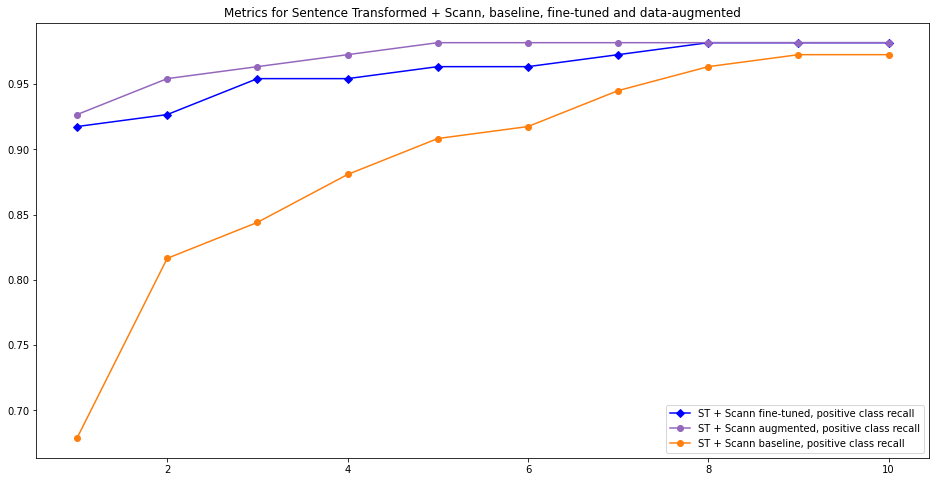

In [ ]:
import matplotlib.pyplot  as plt
import numpy as np


x = range(1, 11)

plt.plot(x, r_pos_tuned, '-bD',  label='ST + Scann fine-tuned, positive class recall')
# plt.plot(x, r_neg_tuned, '-C0D',  label='ST + Scann fine-tuned, negative class recall')
# plt.plot(x, f1_tuned, '-C2D',  label='ST + Scann fine-tuned, macro avg F1')

plt.plot(x, r_pos_aug, '-C4o',  label='ST + Scann augmented, positive class recall')
# plt.plot(x, r_neg_aug, '-C6o',  label='ST + Scann augmented, negative class recall')
# plt.plot(x, f1_aug, '-mo',  label='ST + Scann augmented, macro avg class F1')

plt.plot(x, r_pos_base, '-C1o',  label='ST + Scann baseline, positive class recall')
# plt.plot(x, r_neg_base, '-C3o',  label='ST + Scann baseline, negative class recall')
# plt.plot(x, f1_base, '-C8o',  label='ST + Scann baseline, macro avg class F1')

plt.legend()
plt.title('Metrics for Sentence Transformed + Scann, baseline, fine-tuned and data-augmented')
# plotting a line plot after changing it's width and height
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.show()

